# Завдання

1. Завантажте зображення та застосуйте до нього фільтр Собеля для виділення вертикальних та горизонтальних границь. Відобразіть результат.

2. Реалізуйте фільтр Canny для виділення границь на зображенні. Візьміть зображення з попереднього завдання. Відобразіть результат.

3. Застосуйте фільтр Робертса для виділення границь на зображенні. Візьміть зображення з попереднього завдання. Відобразіть результат.

4. Порівняйте результати фільтрів Собеля, Кенні та Робертса для виділення границь на зображенні. Обгрунтуйте висновки.

# Розв'язок

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Завантаження зображення

In [2]:
def load_image(file):
    img = cv2.imread(file, cv2.IMREAD_COLOR)
    return img

In [3]:
def show_image(file):
    img = load_image(file)
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.axis("off")
    plt.imshow(img_RGB)
    return plt.show()

In [4]:
def save_image(filename, image):
    saved_image = cv2.imwrite(filename, image)
    print(f"saved as {filename}")
    return None

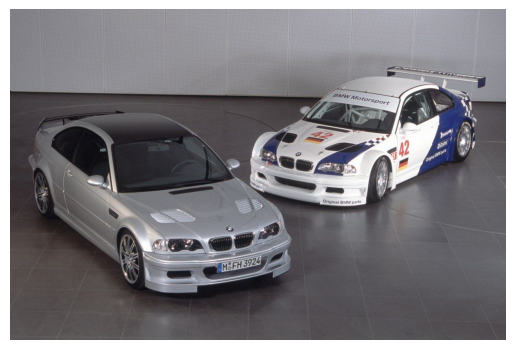

In [5]:
show_image("BMW.jpg")

# Фільтр SOBEL

In [6]:
def sobel(file):
    img = load_image(file)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    sobel_x = cv2.filter2D(gray, -1, kernel_x)
    sobel_y = cv2.filter2D(gray, -1, kernel_y)
    sobel = sobel_x + sobel_y
    filename = f"sobel_{file}"
    save_image(filename, sobel)
    return show_image(filename)

saved as sobel_BMW.jpg


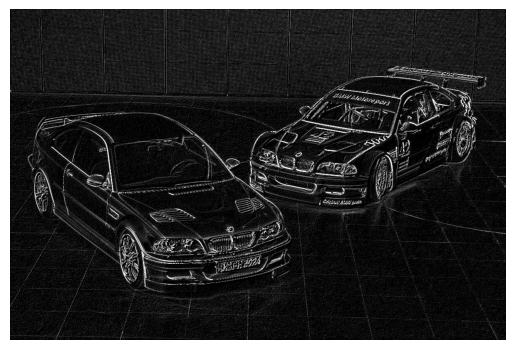

In [7]:
sobel("BMW.jpg")

# Фільтр CANNY

In [8]:
def canny(file):
    img = load_image(file)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    canny = cv2.Canny(gray, 50, 150)
    filename = f"canny_{file}"
    save_image(filename, canny)
    return show_image(filename)

saved as canny_BMW.jpg


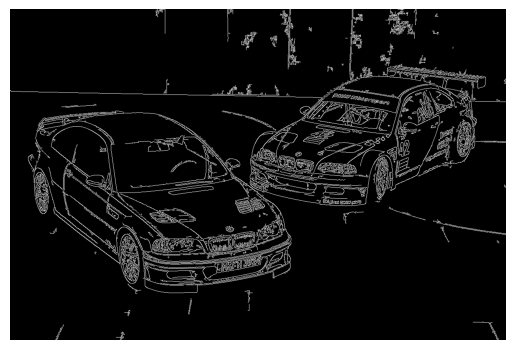

In [9]:
canny("BMW.jpg")

# Фільтр ROBERTS

In [10]:
def roberts(file):
    img = load_image(file)
    kernel_x = np.array([[1, 0], [0, -1]], dtype=np.float32)
    kernel_y = np.array([[0, 1], [-1, 0]], dtype=np.float32)
    gx = cv2.filter2D(img, -1, kernel_x)
    gy = cv2.filter2D(img, -1, kernel_y)
    magnitude = np.sqrt(np.square(gx) + np.square(gy))
    magnitude = np.uint8(magnitude / np.max(magnitude) * 255)
    filename = f"roberts_{file}"
    save_image(filename, magnitude)
    return show_image(filename)

saved as roberts_BMW.jpg


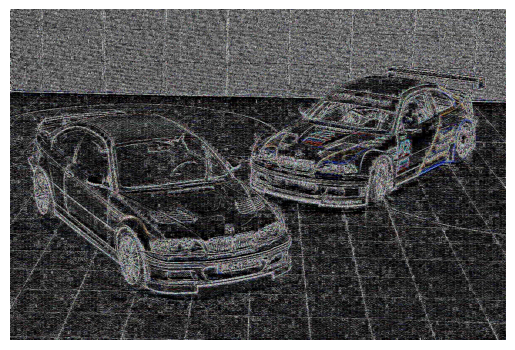

In [11]:
roberts("BMW.jpg")

# Порівняння результатів

In [12]:
def colored(file):
    img = cv2.imread(file, cv2.IMREAD_COLOR)
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img_RGB

In [13]:
def compare(file, sobel, canny, roberts):
    fig, axs = plt.subplots(2, 2, figsize=(10,8))
    axs[0, 0].imshow(colored(file))
    axs[0, 0].axis("off")
    axs[0, 0].set_title("Original")
    axs[0, 1].imshow(colored(sobel))
    axs[0, 1].axis("off")
    axs[0, 1].set_title("Sobel")
    axs[1, 0].imshow(colored(canny))
    axs[1, 0].axis("off")
    axs[1, 0].set_title("Canny")
    axs[1, 1].imshow(colored(roberts))
    axs[1, 1].axis("off")
    axs[1, 1].set_title("Roberts")
    plt.show()

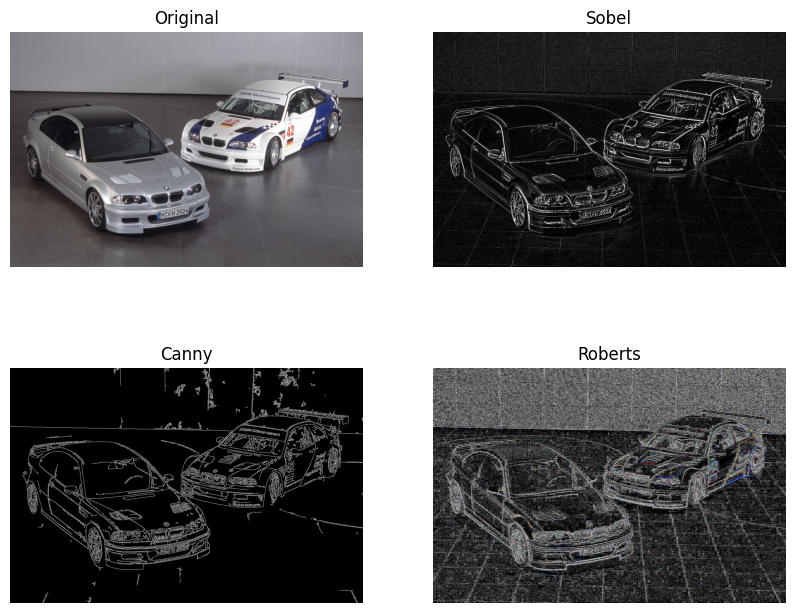

In [14]:
compare("BMW.jpg", "sobel_BMW.jpg", "canny_BMW.jpg", "roberts_BMW.jpg")

**За результатами застосування трьох різних фільтрів (SOBEL, CANNY і ROBERTS) у даному конкретному випадку для виділення границь на зображенні, візуально можемо зробити висновок, що найкращий результат забезпечив саме фільтр SOBEL. Основна різниця між застосованими фільтрами полягає у методах виявлення границь на зображенні та точності результуючих границь. SOBEL - це найпростіший з цих методів, ROBERTS - менш точний за SOBEL, а CANNY - найскладніший та найточніший метод з трьох. Таким чином, вибір фільтру для роботи із зображенням має враховувати переваги та недоліки цих методів обробки і найголовніше - особливості самого зображення та кінцевий результат, якого треба досягнути.**